# Problem $#3$ Linear Regression
## Proposed TensorFlow model y = W*ln(x) + b

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# Parameters of the model
W = tf.Variable(0.0, tf.float32)
b = tf.Variable(0.0, tf.float32)

# Placeholder for feed data
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Model
hypothesis = W * tf.log( x ) + b

In [3]:
# Load Data
data = pd.DataFrame.from_csv('tabla_3.csv')
data.head()

,x,y
0,0.318245,-7.988817
1,1.968337,3.102613
2,0.345255,-5.933103
3,0.489693,-14.079348
4,1.134658,-3.742560


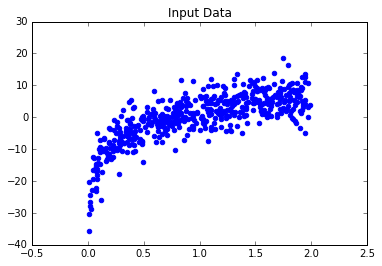

In [4]:
# Graph the input data
# Print the input points data
plt.scatter(data['x'], data['y'], color='blue')
plt.title('Input Data')
plt.show()

### Cost

In [5]:
cost = tf.reduce_mean(tf.square(hypothesis - y))

### Minimize

In [6]:
alpha = tf.Variable(0.001) # Learn rate
optimizer = tf.train.GradientDescentOptimizer(alpha)
train = optimizer.minimize(cost)

### Train

In [7]:
# Start all variables after execute nodes
init = tf.global_variables_initializer()

# Launch the graph
session = tf.Session()
session.run(init)

print('Iteration - Error - W - b')
for i in range(8000):
    session.run(train, {x:data['x'], y:data['y']})        
    if i % 100 == 0:
            # Line description: #iteration, error, computed values
            print(i, session.run(cost, {x: data['x'], y:data['y']}), session.run(W), session.run(b))
    

Iteration - Error - W - b
0 59.0944 0.0128983 -5.07899e-05
100 45.5112 1.17634 0.0303409
200 36.44 2.12389 0.113639
300 30.2904 2.89854 0.229493
400 26.0609 3.53424 0.363372
500 23.1126 4.05786 0.50506
600 21.032 4.49073 0.64753
700 19.5479 4.84986 0.786088
800 18.4791 5.14883 0.917738
900 17.7033 5.39853 1.0407
1000 17.1363 5.60773 1.15408
1100 16.7196 5.78354 1.25755
1200 16.4121 5.93167 1.35123
1300 16.1842 6.05683 1.43548
1400 16.0148 6.16282 1.51086
1500 15.8887 6.25279 1.578
1600 15.7945 6.32932 1.63757
1700 15.7242 6.39453 1.69027
1800 15.6715 6.45019 1.73675
1900 15.6321 6.49779 1.77767
2000 15.6025 6.53855 1.81361
2100 15.5803 6.57349 1.84513
2200 15.5637 6.60348 1.87274
2300 15.5512 6.62926 1.89688
2400 15.5418 6.65143 1.91797
2500 15.5348 6.67051 1.93638
2600 15.5295 6.68695 1.95244
2700 15.5255 6.70113 1.96643
2800 15.5226 6.71336 1.97862
2900 15.5203 6.72391 1.98922
3000 15.5186 6.73303 1.99845
3100 15.5174 6.7409 2.00648
3200 15.5164 6.7477 2.01346
3300 15.5157 6.75359 2.

### Plot Prediction line & Normalized data

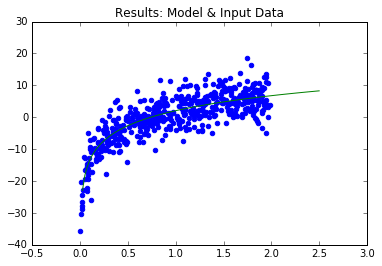

In [8]:
# Generate points for the model
model_x = np.linspace(0, 2.5, 100)
model_y = session.run(hypothesis, {x: model_x})

# Print the input points data
plt.scatter(data['x'], data['y'], color='blue')
plt.plot(model_x, model_y, color='green')
plt.title('Results: Model & Input Data')
plt.show()
